In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
#from heatmap import heatmap, corrplot

In [4]:
#Load csv into pandas dataframe
#df=pd.read_csv('Downloads/US_Accidents_Dec21_updated.csv')
df=pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
pd.set_option('display.max_columns', None)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,Fa

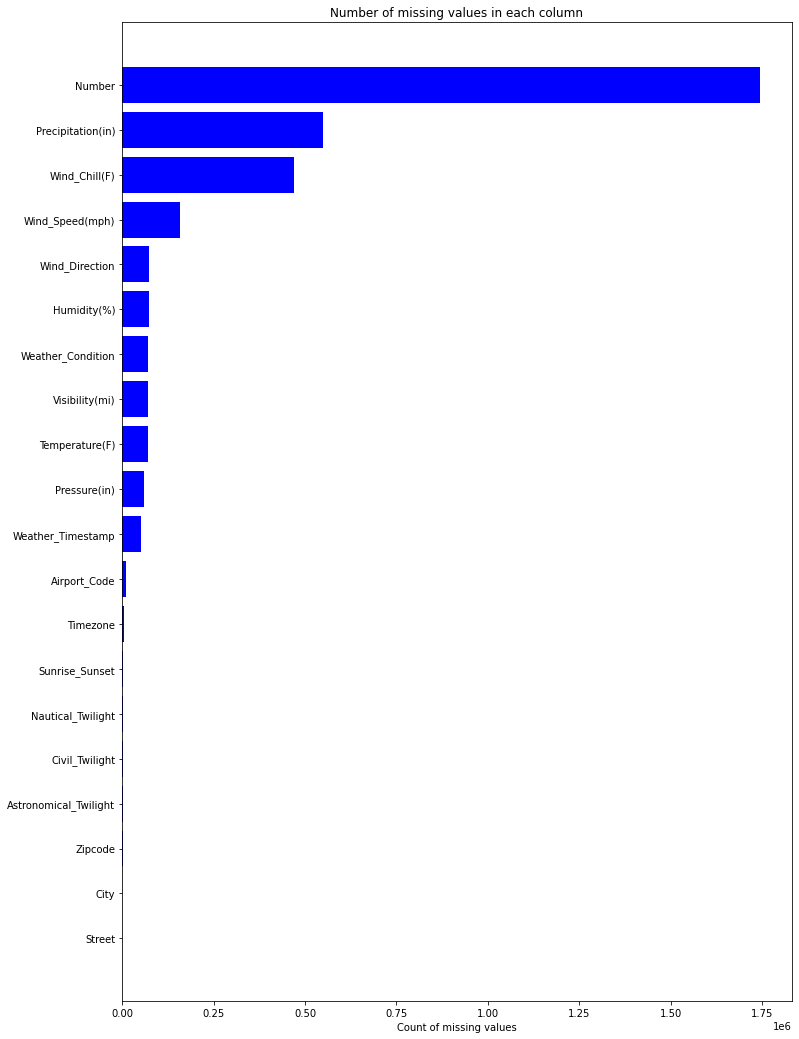

In [6]:
#Visualizing the columns with missing values

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind,missing_df.missing_count.values,color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [7]:
#Finding the ratio of the missing data as compared to the original data

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['columns_name','missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] /df.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.1]

,columns_name,missing_count,missing_ratio
10,Number,1743911,0.612900
22,Wind_Chill(F),469643,0.165057
28,Precipitation(in),549458,0.193108


In [8]:
#From the above data, we decided to remove 'Number' column because it has the most amount of missing data
#Removed ID since there is already indexing
#Removed Start_Lng, End_Lng, Start_Lat, End_Lat as the zipcode already gives a location
#Removed Description as the information it gives exists as columns in the dataframe
#Removed Street and Side as it will not matter in the severity of the accident I.E. Left or right side of the street
#Removed Country because all the data is gathered from US
#Removed Airport Code as well, deeming the data as irrelevant in predicting the severity

to_drop=['ID','Start_Lng','End_Lat','End_Lng','Start_Lat','Description','Number','Street','Side','Country','Airport_Code']
df.drop(to_drop, inplace=True, axis=1)
df

,Severity,Start_Time,End_Time,Distance(mi),City,County,State,Zipcode,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Dublin,Franklin,OH,43017,US/Eastern,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,0.747,Dayton,Montgomery,OH,45424,US/Eastern,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,0.055,Cincinnati,Hamilton,OH,45203,US/Eastern,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,0.123,Akron,Summit,OH,44311,US/Eastern,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,Cincinnati,Hamilton,OH,45217,US/Eastern,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Riverside,Riverside,CA,92501,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,San Diego,San Diego,CA,92108,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Orange,Orange,CA,92866,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,Culver City,Los Angeles,CA,90230,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
#Dropping all rows that contains null/NaN values

df = df.dropna()
df

,Severity,Start_Time,End_Time,Distance(mi),City,County,State,Zipcode,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Dublin,Franklin,OH,43017,US/Eastern,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,Cincinnati,Hamilton,OH,45217,US/Eastern,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,Cleveland,Cuyahoga,OH,44130,US/Eastern,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,Westerville,Franklin,OH,43081,US/Eastern,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
10,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,Cincinnati,Hamilton,OH,45216,US/Eastern,2016-02-08 15:47:00,33.8,29.6,100.0,29.66,3.0,NNW,4.6,0.03,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Riverside,Riverside,CA,92501,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845338,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,San Diego,San Diego,CA,92108,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845339,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Orange,Orange,CA,92866,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2845340,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,Culver City,Los Angeles,CA,90230,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


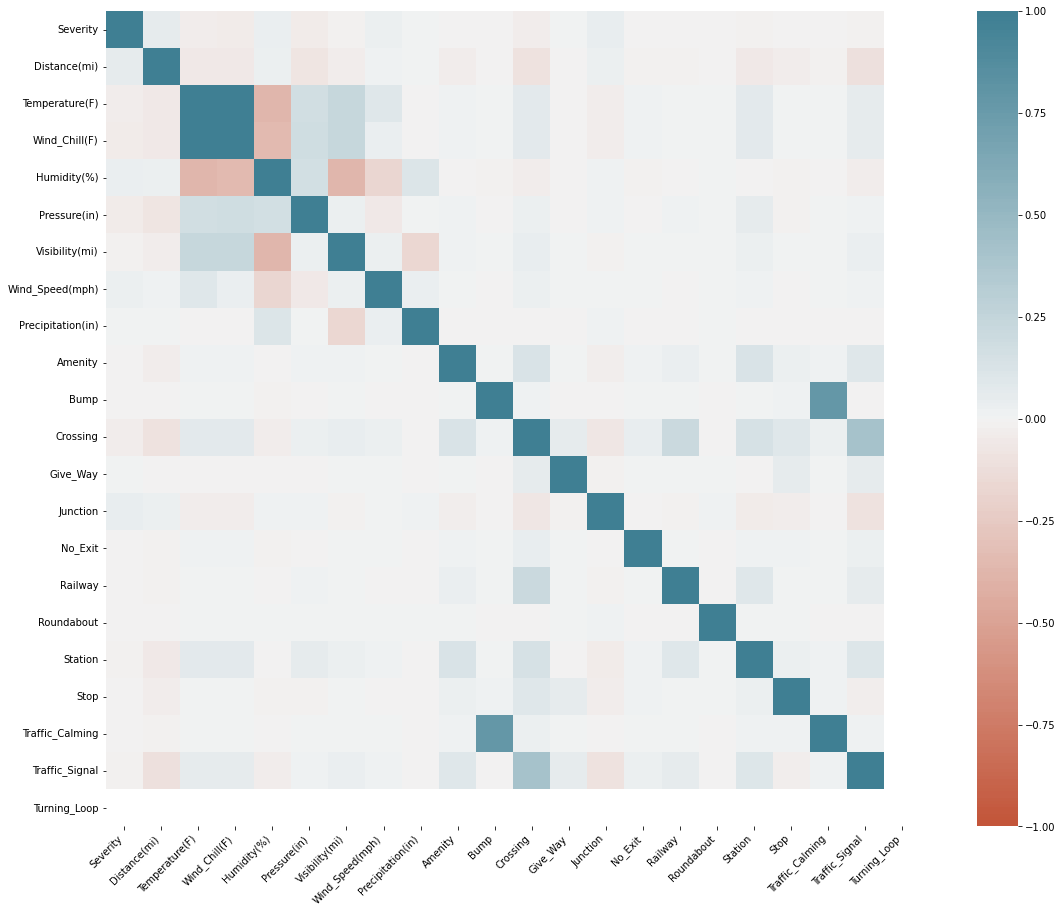

In [10]:
#Creating correlation matrix plot map
#Note, the matrix plot will not take cols with datatype 'object'

corr = df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
#Checking the datatype of all the cols

dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,Severity,int64
1,Start_Time,object
2,End_Time,object
3,Distance(mi),float64
4,City,object
5,County,object
6,State,object
7,Zipcode,object
8,Timezone,object
9,Weather_Timestamp,object


In [12]:
#Checking count of the cols different datatypes

dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,13
1,int64,1
2,float64,8
3,object,14


In [13]:
#Creating a Time_Duration(min) col to identify the total duration of the accident
#Possible false positive warning for 'CopyWarning' depending on the version Pandas

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\2415606545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\2415606545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')
C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\2415606545.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [14]:
df

,Severity,Start_Time,End_Time,Distance(mi),City,County,State,Zipcode,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Dublin,Franklin,OH,43017,US/Eastern,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,360.0
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,Cincinnati,Hamilton,OH,45217,US/Eastern,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
7,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,Cleveland,Cuyahoga,OH,44130,US/Eastern,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
9,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,Westerville,Franklin,OH,43081,US/Eastern,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
10,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,Cincinnati,Hamilton,OH,45216,US/Eastern,2016-02-08 15:47:00,33.8,29.6,100.0,29.66,3.0,NNW,4.6,0.03,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Riverside,Riverside,CA,92501,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.0
2845338,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,San Diego,San Diego,CA,92108,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,27.0
2845339,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Orange,Orange,CA,92866,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,28.0
2845340,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,Culver City,Los Angeles,CA,90230,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.0


In [15]:
#Finding all the unique values in col 'Weather_Condition' 
#and group them up together to reduce the size by taking the more severe of the condition

print(df.Weather_Condition.unique())
len(df.Weather_Condition.unique())

['Light Rain' 'Snow' 'Light Snow' 'Mostly Cloudy' 'Cloudy' 'Partly Cloudy'
 'Overcast' 'Scattered Clouds' 'Light Freezing Drizzle' 'Light Drizzle'
 'Rain' 'Fair' 'Fog' 'Haze' 'Light Freezing Rain' 'Clear' 'Heavy Snow'
 'Drizzle' 'Heavy Rain' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Blowing Snow' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Rain'
 'Thunderstorms and Rain' 'Light Thunderstorms and Snow' 'Mist' 'T-Storm'
 'Rain / Windy' 'Wintry Mix' 'Heavy Thunderstorms and Rain'
 'Partly Cloudy / Windy' 'Heavy T-Storm' 'Shallow Fog'
 'Light Rain / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Freezing Rain / Windy' 'Light Freezing Fog' 'Mostly Cloudy / Windy'
 'Smoke' 'Light Snow / Windy' 'Heavy Ice Pellets' 'Thunderstorm'
 'Heavy Snow / Windy' 'Heavy Rain / Windy' 'Small Hail' 'Heavy Drizzle'
 'Heavy T-Storm / Windy' 'Fog / Windy' 'Showers in the Vicinity'
 'Thunder

114

In [16]:
new_weathercon=  ['Light Rain' ,'Snow', 'Light Snow', 'Mostly Cloudy', 'Cloudy', 'Partly Cloudy',
 'Overcast', 'Scattered Clouds', 'Light Freezing Drizzle', 'Light Drizzle',
 'Rain', 'Fair', 'Fog', 'Haze', 'Light Freezing Rain' ,'Clear' ,'Heavy Snow',
 'Drizzle', 'Heavy Rain', 'Light Ice Pellets', 'Thunder',
 'Thunder in the Vicinity', 'Windy' ,'Light Rain with Thunder',
 'Heavy Thunderstorms and Snow', 'Blowing Snow', 'Cloudy',
 'Ice Pellets', 'N/A Precipitation', 'Light Thunderstorms and Rain',
 'Thunderstorms and Rain' ,'Light Thunderstorms and Snow' ,'Mist', 'T-Storm',
 'Rain', 'Wintry Mix' ,'Heavy Thunderstorms and Rain',
 'Windy', 'Heavy T-Storm', 'Shallow Fog',
 'Windy' ,'Blowing Dust', 'Blowing Dust',
 'Freezing Rain' ,'Light Freezing Fog' ,'Mostly Cloudy',
 'Smoke', 'Light Snow', 'Heavy Ice Pellets' ,'Thunderstorm',
 'Heavy Snow', 'Heavy Rain', 'Small Hail' ,'Heavy Drizzle',
 'Heavy T-Storm / Windy', 'Fog', 'Showers in the Vicinity',
 'Thunder' ,'Snow', 'Haze', 'Light Snow and Sleet',
 'T-Storm', 'Patches of Fog' ,'Dust Whirlwinds',
 'Light Snow with Thunder', 'Rain Shower' ,'Blowing Snow',
 'Light Rain Shower', 'Snow and Sleet', 'Drizzle and Fog', 'Light Sleet',
 'Windy', 'Light Snow Shower' ,'Snow and Thunder',
 'Light Sleet', 'Smoke' ,'Wintry Mix',
 'Widespread Dust', 'Windy' ,'Squalls', 'Tornado',
 'Squalls', 'Hail' ,'Blowing Snow Nearby', 'Partial Fog',
 'Widespread Dust', 'Sand' ,'Wintry Mix',
 'Light Freezing Rain' ,'Light Snow and Sleet',
 'Heavy Rain Shower' ,'Dust Whirlwinds',
 'Light Rain Shower', 'Thunder and Hail', 'Freezing Rain',
 'Heavy Sleet', 'Snow Grains' ,'Sleet' ,'Freezing Drizzle',
 'Snow and Sleet', 'Heavy Freezing Drizzle', 'Heavy Freezing Rain',
 'Blowing Sand', 'Wintry Mix', 'Sleet',
 'Patches of Fog', 'Sand', 'Heavy Rain Shower',
 'Drifting Snow' ,'Light Blowing Snow', 'Light Rain Showers',
 'Heavy Thunderstorms with Small Hail' ,'Heavy Snow with Thunder',
 'Thunder and Hail']

In [17]:
df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(),new_weathercon)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\633066683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(),new_weathercon)


In [18]:
#Smaller now, but will still have to further narrow the pool

len(df.Weather_Condition.unique())
df.Weather_Condition.unique()

array(['Light Rain', 'Snow', 'Light Snow', 'Mostly Cloudy', 'Cloudy',
       'Partly Cloudy', 'Overcast', 'Scattered Clouds',
       'Light Freezing Drizzle', 'Light Drizzle', 'Rain', 'Fair', 'Fog',
       'Haze', 'Light Freezing Rain', 'Clear', 'Heavy Snow', 'Drizzle',
       'Heavy Rain', 'Light Ice Pellets', 'Thunder',
       'Thunder in the Vicinity', 'Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Blowing Snow', 'Ice Pellets',
       'N/A Precipitation', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Light Thunderstorms and Snow', 'Mist',
       'T-Storm', 'Wintry Mix', 'Heavy Thunderstorms and Rain',
       'Heavy T-Storm', 'Shallow Fog', 'Blowing Dust', 'Freezing Rain',
       'Light Freezing Fog', 'Smoke', 'Heavy Ice Pellets', 'Thunderstorm',
       'Small Hail', 'Heavy Drizzle', 'Heavy T-Storm / Windy',
       'Showers in the Vicinity', 'Light Snow and Sleet',
       'Patches of Fog', 'Dust Whirlwinds', 'Light Snow with Thunder',


In [19]:
edited_WC = ['Light Rain', 'Snow', 'Light Snow', 'Mostly Cloudy', 'Cloudy',
       'Partly Cloudy', 'Overcast', 'Scattered Clouds',
       'Light Freezing Drizzle', 'Light Drizzle', 'Rain', 'Fair', 'Fog',
       'Haze', 'Light Rain', 'Clear', 'Heavy Snow', 'Drizzle',
       'Heavy Rain', 'Light Ice Pellets', 'Thunder',
       'Thunder', 'Windy', 'Thunder',
       'Heavy Thunderstorms and Snow', 'Blowing Snow', 'Ice Pellets',
       'Precipitation', 'Rain',
       'Thunderstorms', 'Snow', 'Mist',
       'Thunderstorms', 'Wintry Mix', 'Heavy Thunderstorms',
       'Heavy Thunderstorms', 'Shallow Fog', 'Blowing Dust', 'Freezing Rain',
       'Light Freezing Fog', 'Smoke', 'Heavy Ice Pellets', 'Thunderstorm',
       'Small Hail', 'Heavy Drizzle', 'Heavy Thunderstorms',
       'Showers', 'Light Snow and Sleet',
       'Patches of Fog', 'Dust Whirlwinds', 'Light Snow',
       'Rain Shower', 'Light Rain Shower', 'Sleet',
       'Fog', 'Light Sleet', 'Light Snow Shower',
       'Snow', 'Widespread Dust', 'Squalls', 'Tornado',
       'Hail', 'Blowing Snow', 'Partial Fog', 'Sand',
       'Heavy Rain Shower', 'Hail', 'Heavy Sleet',
       'Snow Grains', 'Sleet', 'Freezing Drizzle',
       'Heavy Freezing Drizzle', 'Heavy Rain', 'Blowing Sand',
       'Drifting Snow', 'Blowing Snow', 'Light Rain Showers',
       'Heavy Thunderstorms', 'Heavy Snow']

In [20]:
df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(),edited_WC)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\3984632154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(),edited_WC)


In [21]:
print(len(df.Weather_Condition.unique()))
df.Weather_Condition.unique()

61


array(['Light Rain', 'Snow', 'Light Snow', 'Mostly Cloudy', 'Cloudy',
       'Partly Cloudy', 'Overcast', 'Scattered Clouds',
       'Light Freezing Drizzle', 'Light Drizzle', 'Rain', 'Fair', 'Fog',
       'Haze', 'Clear', 'Heavy Snow', 'Drizzle', 'Heavy Rain',
       'Light Ice Pellets', 'Thunder', 'Windy',
       'Heavy Thunderstorms and Snow', 'Blowing Snow', 'Ice Pellets',
       'Precipitation', 'Thunderstorms', 'Mist', 'Wintry Mix',
       'Heavy Thunderstorms', 'Shallow Fog', 'Blowing Dust',
       'Freezing Rain', 'Light Freezing Fog', 'Smoke',
       'Heavy Ice Pellets', 'Thunderstorm', 'Small Hail', 'Heavy Drizzle',
       'Showers', 'Light Snow and Sleet', 'Patches of Fog',
       'Dust Whirlwinds', 'Rain Shower', 'Light Rain Shower', 'Sleet',
       'Light Sleet', 'Light Snow Shower', 'Widespread Dust', 'Squalls',
       'Tornado', 'Hail', 'Partial Fog', 'Sand', 'Heavy Rain Shower',
       'Heavy Sleet', 'Snow Grains', 'Freezing Drizzle',
       'Heavy Freezing Drizzle', 'B

In [22]:
edited_WC = ['Rain', 'Snow', 'Snow', 'Cloudy', 'Cloudy',
       'Cloudy', 'Cloudy', 'Cloudy',
       'Drizzle', 'Drizzle', 'Rain', 'Fair', 'Fog',
       'Haze', 'Clear', 'Heavy Snow', 'Drizzle', 'Heavy Rain',
       'Sleet', 'Thunder', 'Windy',
       'Heavy Thunderstorms', 'Snow', 'Sleet',
       'Precipitation', 'Thunderstorms', 'Mist', 'Wintry Mix',
       'Heavy Thunderstorms', 'Fog', 'Dust',
       'Rain', 'Fog', 'Smoke',
       'Heavy Sleet', 'Thunderstorms', 'Hail', 'Drizzle',
       'Rain', 'Sleet', 'Fog',
       'Dust Whirlwinds', 'Rain', 'Drizzle', 'Sleet',
       'Sleet', 'Snow', 'Dust', 'Squalls',
       'Tornado', 'Hail', 'Fog', 'Sand', 'Heavy Rain',
       'Heavy Sleet', 'Snow', 'Drizzle',
       'Drizzle', 'Sand', 'Snow',
       'Rain']

In [23]:
df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(),edited_WC)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\3984632154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(),edited_WC)


In [24]:
#Note, Finalized version for 'Weather_Condition' col, check with Prof if this is ok

print(len(df.Weather_Condition.unique()))
df.Weather_Condition.unique()

26


array(['Rain', 'Snow', 'Cloudy', 'Drizzle', 'Fair', 'Fog', 'Haze',
       'Clear', 'Heavy Snow', 'Heavy Rain', 'Sleet', 'Thunder', 'Windy',
       'Heavy Thunderstorms', 'Precipitation', 'Thunderstorms', 'Mist',
       'Wintry Mix', 'Dust', 'Smoke', 'Heavy Sleet', 'Hail',
       'Dust Whirlwinds', 'Squalls', 'Tornado', 'Sand'], dtype=object)

In [25]:
#Replacing the values of Weather_Condition with numerical values for the machine learning
i = 1
variable = []

for x in df.Weather_Condition.unique():
    variable.append(i)
    i += 1
    
print(variable)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [26]:
df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(), variable)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\168226722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather_Condition'] = df['Weather_Condition'].replace(df.Weather_Condition.unique(), variable)


In [27]:
df

,Severity,Start_Time,End_Time,Distance(mi),City,County,State,Zipcode,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Dublin,Franklin,OH,43017,US/Eastern,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,1,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,360.0
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,Cincinnati,Hamilton,OH,45217,US/Eastern,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,1,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
7,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,Cleveland,Cuyahoga,OH,44130,US/Eastern,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,SW,3.5,0.08,2,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
9,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,Westerville,Franklin,OH,43081,US/Eastern,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,West,3.5,0.05,2,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
10,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,Cincinnati,Hamilton,OH,45216,US/Eastern,2016-02-08 15:47:00,33.8,29.6,100.0,29.66,3.0,NNW,4.6,0.03,2,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Riverside,Riverside,CA,92501,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.0
2845338,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,San Diego,San Diego,CA,92108,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,27.0
2845339,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Orange,Orange,CA,92866,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,3,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,28.0
2845340,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,Culver City,Los Angeles,CA,90230,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.0


In [28]:
#Reducing the number of unique Wind_Direction

print(len(df.Wind_Direction.unique()))
df.Wind_Direction.unique()

23


array(['SW', 'WSW', 'West', 'NNW', 'WNW', 'NW', 'W', 'SSW', 'East', 'SE',
       'North', 'ENE', 'NNE', 'NE', 'SSE', 'CALM', 'South', 'ESE', 'S',
       'Variable', 'VAR', 'N', 'E'], dtype=object)

In [29]:
edited_WD = ['SW', 'WSW', 'W', 'NNW', 'WNW', 'NW', 'W', 'SSW', 'E', 'SE',
       'N', 'ENE', 'NNE', 'NE', 'SSE', 'CALM', 'S', 'ESE', 'S',
       'VAR', 'VAR', 'N', 'E']

In [30]:
df['Wind_Direction'] = df['Wind_Direction'].replace(df.Wind_Direction.unique(),edited_WD)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\2077829999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind_Direction'] = df['Wind_Direction'].replace(df.Wind_Direction.unique(),edited_WD)


In [31]:
print(len(df.Wind_Direction.unique()))
df.Wind_Direction.unique()

18


array(['SW', 'WSW', 'W', 'NNW', 'WNW', 'NW', 'SSW', 'E', 'SE', 'N', 'ENE',
       'NNE', 'NE', 'SSE', 'CALM', 'S', 'ESE', 'VAR'], dtype=object)

In [32]:
j = 1
countWindDirection = []

for x in df.Wind_Direction.unique():
    countWindDirection.append(j)
    j += 1
    
print(countWindDirection)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [33]:
df['Wind_Direction'] = df['Wind_Direction'].replace(df.Wind_Direction.unique(), countWindDirection)
df

C:\Users\Ivan\AppData\Local\Temp\ipykernel_47176\1984036252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind_Direction'] = df['Wind_Direction'].replace(df.Wind_Direction.unique(), countWindDirection)


,Severity,Start_Time,End_Time,Distance(mi),City,County,State,Zipcode,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Duration(min)
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Dublin,Franklin,OH,43017,US/Eastern,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,1,10.4,0.00,1,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,360.0
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,Cincinnati,Hamilton,OH,45217,US/Eastern,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,2,10.4,0.01,1,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
7,2,2016-02-08 11:51:46,2016-02-08 17:51:46,0.521,Cleveland,Cuyahoga,OH,44130,US/Eastern,2016-02-08 11:51:00,33.1,30.0,92.0,29.63,0.5,1,3.5,0.08,2,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
9,2,2016-02-08 15:16:43,2016-02-08 21:16:43,0.826,Westerville,Franklin,OH,43081,US/Eastern,2016-02-08 15:12:00,32.0,28.7,100.0,29.59,0.5,3,3.5,0.05,2,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
10,2,2016-02-08 15:43:50,2016-02-08 21:43:50,0.307,Cincinnati,Hamilton,OH,45216,US/Eastern,2016-02-08 15:47:00,33.8,29.6,100.0,29.66,3.0,4,4.6,0.03,2,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Riverside,Riverside,CA,92501,US/Pacific,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,3,13.0,0.00,5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.0
2845338,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,San Diego,San Diego,CA,92108,US/Pacific,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,1,6.0,0.00,5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,27.0
2845339,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Orange,Orange,CA,92866,US/Pacific,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,7,10.0,0.00,3,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,28.0
2845340,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,Culver City,Los Angeles,CA,90230,US/Pacific,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,1,8.0,0.00,5,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,29.0


Distance(mi)
0.06237680255782636
Temperature(F)
-0.03853944978229057
Wind_Chill(F)
-0.04190893854459626
Humidity(%)
0.03201807640744461


TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

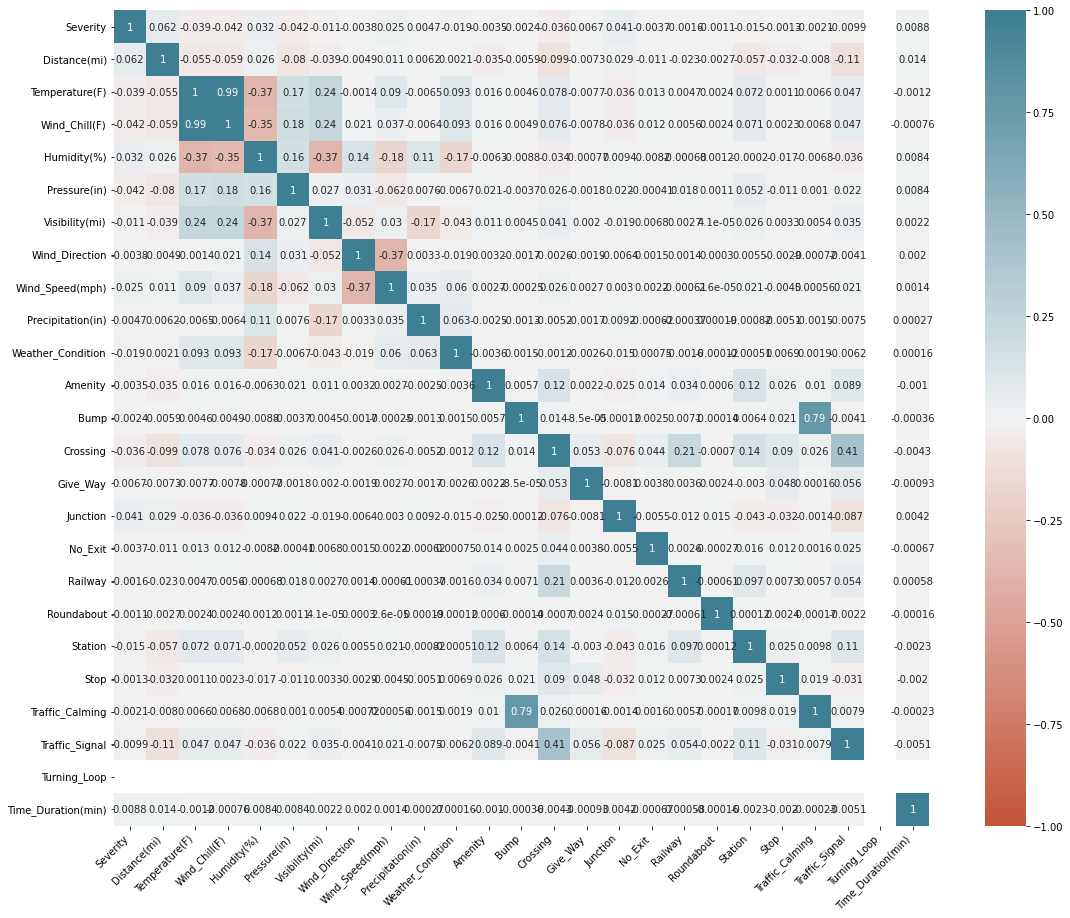

In [60]:
#Creating correlation matrix plot map
#Note, the matrix plot will not take cols with datatype 'object'

first = sec = third = 0
firstFeature = secFeature = thirdFeature
corr = df.corr()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


for x in corr:
    if x == 'Severity':
        continue
    else:
        if first < corr['Severity'][x]:
            third = sec
            thirdFeature = secFeature
            sec = first
            secFeature = firstFeature
            first = corr['Severity'][x]
            firstFeature = x
        elif sec < corr['Severity'][x]:
            third = sec
            thirdFeature = secFeature
            sec = corr['Severity'][x]
            sec = x
        elif third < corr['Severity'][x]:
            third = corr['Severity'][x]
            thirdFeature = x
            
        print(x)
        print(corr['Severity'][x])

print(firstFeature)
print(first)
print(secFeature)
print(sec)
print(thirdFeature)
print(third)


In [ ]:
X=df.drop('Severity4', axis=1).values
y=df['Severity4'].values

X = np.expand_dims(X, 2)

_, X, _, y = train_test_split(\
  X, y, test_size=0.01, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30, random_state=42)